[ibon訂房網站](https://hotel.ibon.com.tw/search.aspx?city=11&checkin=2021-08-14&checkout=2021-08-15&people=2&querys=%E5%8D%97%E6%8A%95)
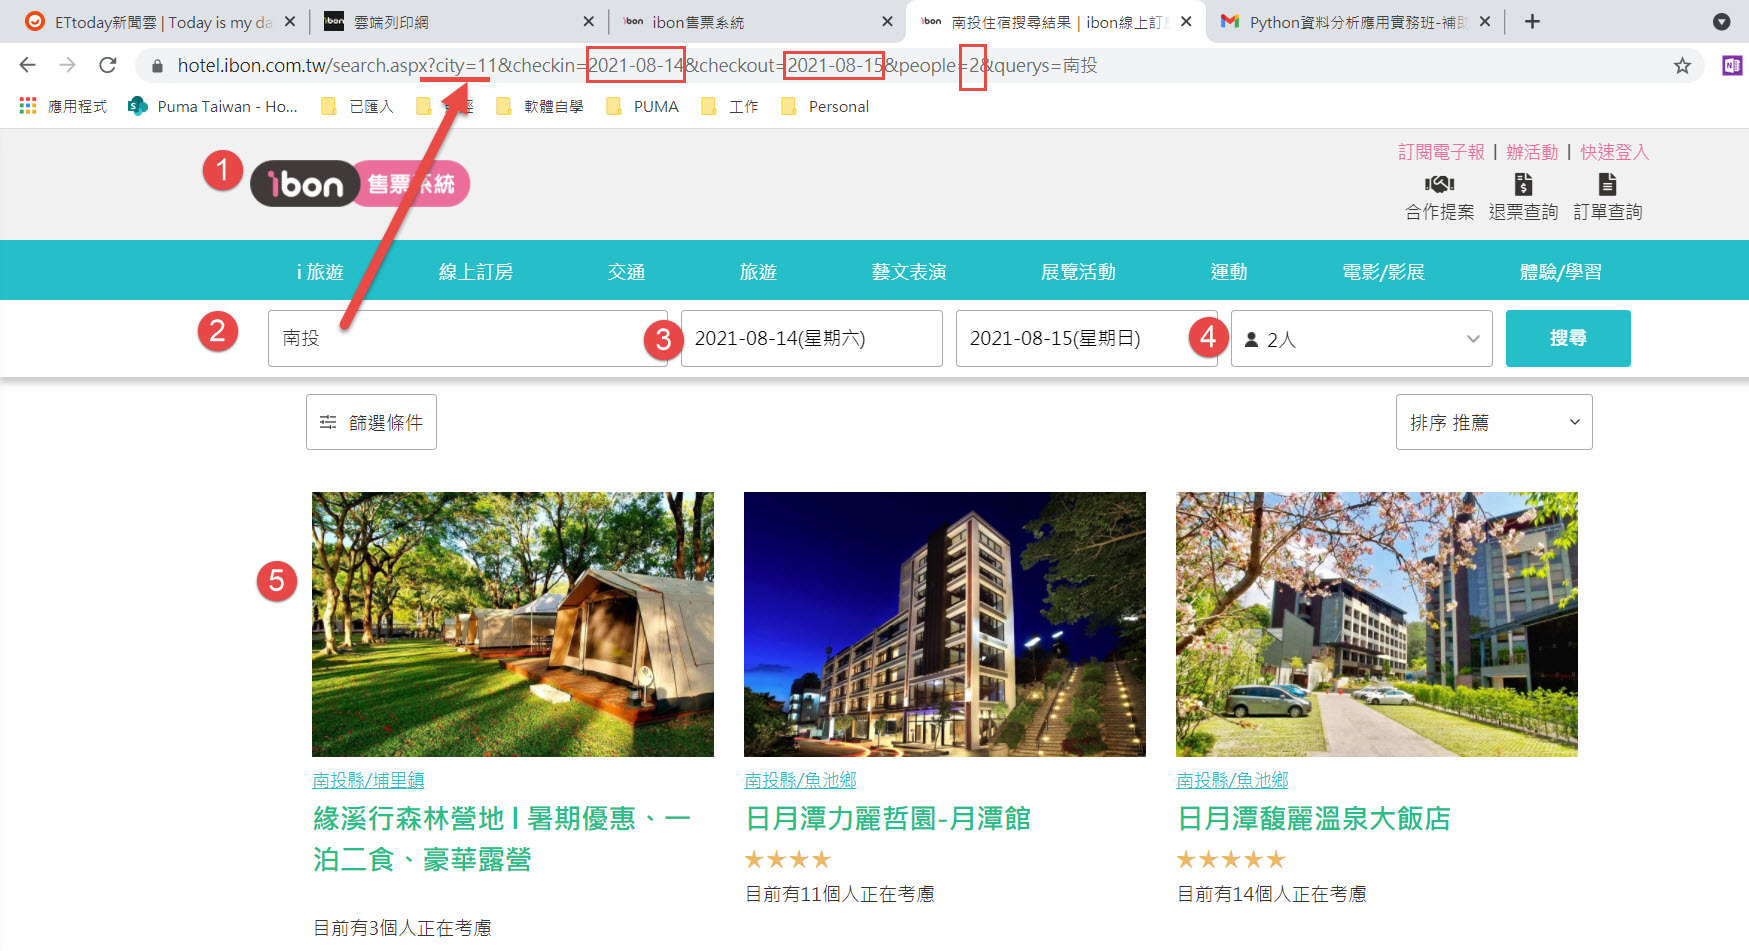

In [43]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd

url="https://hotel.ibon.com.tw/search.aspx?city=11&checkin=2021-08-14&checkout=2021-08-15&people=2&querys=%E5%8D%97%E6%8A%95"
r.get(url) #先確認有無抓到

<Response [200]>

In [45]:
html=r.get(url)
soup=BeautifulSoup(html.text,'lxml')
print(soup)

<!DOCTYPE html>
<html>
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>
	南投住宿搜尋結果｜ibon線上訂房
</title><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="在尋找南投住宿嗎？ibon訂房網提供多間南投住宿選擇！安全預訂，不收訂房手續費，還享超划算的ibon獨家促銷優惠。" name="description"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<!-- Favicon -->
<link href="favicon.ico" rel="shortcut icon"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>ibon售票系統</title>
<meta content="最便利購票入口-ibon售票系統網站" name="description"/>
<meta content="溫泉券,住宿券,休閒活動,主題樂園,美食券,休閒農場,精品旅館休憩,台灣好行,中華職棒門票,運動賽事門票,展覽票,演唱會門票,限時搶購,秒殺票,親子活動,演講活動,威秀,美麗華,樂聲,影城購票,電影票,院線電影,音樂節目購票,講座門票,舞蹈表演門票,戲劇門票,ibon購票,ibon取票,ibon退票須知,ibon退票查詢,便利生活站,台灣高鐵,台灣鐵路,統聯,和欣,國光,手機購票,網站購票,台鐵,高鐵,中華隊國際賽,ibon,火車票,連假,出遊,航空票,機

In [5]:
#取較小範圍
content=soup.find_all('li',class_="ttm-result-hotel-item")
#試看第1筆內容
content[0]

<li class="ttm-result-hotel-item" id="HotelItem">
<div class="ttm-result-hotel-img">
<a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$repResults$ctl01$LinkButton2','')" id="LinkButton2">
<div class="imageDiv" style="background-image: url('https://image-store.asiayo.com/bnb/39226/autoxauto/desc_qTU3Me3R4w5ceX.jpg'), url('/images/no_picture.jpg');"></div>
</a>
</div>
<div class="ttm-result-hotel-content">
<div class="ttm-result-area-wrap">
<span class="ttm-result-area">南投縣/埔里鎮
                                            

                                        </span>
</div>
<div class="ttm-result-name">
<a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$repResults$ctl01$LinkButton3','')" id="LinkButton3"><span id="Label1">緣溪行森林營地 l 暑期優惠、一泊二食、豪華露營</span></a>
</div>
<div class="br-theme-css-stars" style="display: inline-block;">
</div>
<div class="ttm-result-consider">目前有3個人正在考慮</div>
<div class="ttm-result-booking">
<div class="ttm-original-price" id="original_price"

In [46]:
#找到活動名稱
active=content[0].find('div',class_='ttm-result-name').a.text
print(active)

緣溪行森林營地 l 暑期優惠、一泊二食、豪華露營


In [65]:
#找到地點
area=content[0].find('span',class_='ttm-result-area').text
print(area) #把空格脫光光

南投縣/埔里鎮
                                            

                                        


In [48]:
#找出價格
price=content[0].find('div',class_='ttm-result-price').span.text
print(price)

$2,900


In [49]:
len(content)

9

In [67]:
df=pd.DataFrame(columns=["飯店", "地點",'價格'])
for i in range(len(content)):
    active=content[i].find('div',class_='ttm-result-name').a.text.split(' ')[0]
    area=content[i].find('span',class_='ttm-result-area').text.strip()
    price=content[i].find('div',class_='ttm-result-price').span.text
    df= df.append({"飯店":active.split('｜')[0],"地點":area,"價格":price}, ignore_index=True) #有討厭的'｜'在這裡去除
df

,飯店,地點,價格
0,緣溪行森林營地,南投縣/埔里鎮,"$2,900"
1,日月潭力麗哲園-月潭館,南投縣/魚池鄉,"$5,500"
2,日月潭馥麗溫泉大飯店,南投縣/魚池鄉,"$5,599"
3,日月潭力麗哲園-日潭館,南投縣/魚池鄉,"$5,850"
4,竹山民宿-知竹常樂民宿,南投縣/竹山鎮,"$1,850"
5,日月潭瑞居行旅,南投縣/魚池鄉,"$1,904"
6,清境愛立家生活村,南投縣/仁愛鄉,"$2,280"
7,Q,南投縣/埔里鎮,"$2,430"
8,溪頭溪之谷民宿,南投縣/鹿谷鄉,"$2,500"


In [71]:
#把資料寫入csv
df.to_csv('hotel_list.csv')
print('檔案寫入完成!')

檔案寫入完成!


In [ ]:
##下一步可以學關鍵字替換
##Tkinter的輸入方式
##總共有多少頁全部下載